# Curve with error band

This example illustrates how to draw an error band around a parametrized curve.

A parametrized curve x(t), y(t) can directly be drawn using `~.Axes.plot`.

[None]

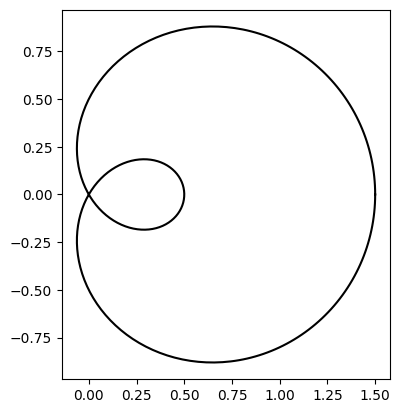

In [2]:
# sphinx_gallery_thumbnail_number = 2

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

N = 400
t = np.linspace(0, 2 * np.pi, N)
r = 0.5 + np.cos(t)
x, y = r * np.cos(t), r * np.sin(t)

fig, ax = plt.subplots()
ax.plot(x, y, "k")
ax.set(aspect=1)

An error band can be used to indicate the uncertainty of the curve.
In this example we assume that the error can be given as a scalar *err*
that describes the uncertainty perpendicular to the curve in every point.

We visualize this error as a colored band around the path using a
`.PathPatch`. The patch is created from two path segments *(xp, yp)*, and
*(xn, yn)* that are shifted by +/- *err* perpendicular to the curve *(x, y)*.

Note: This method of using a `.PathPatch` is suited to arbitrary curves in
2D. If you just have a standard y-vs.-x plot, you can use the simpler
`~.Axes.fill_between` method (see also
:doc:`/gallery/lines_bars_and_markers/fill_between_demo`).

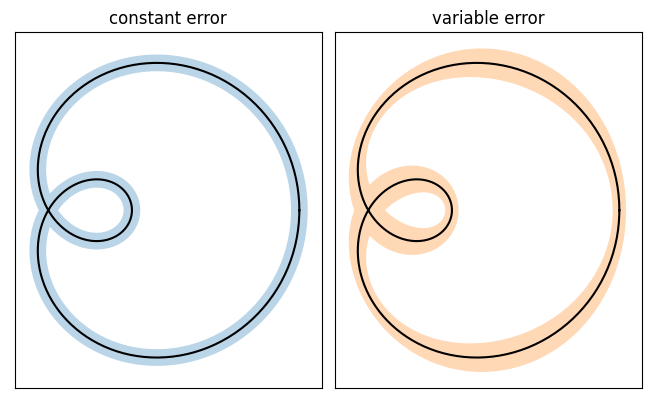

In [3]:

def draw_error_band(ax, x, y, err, **kwargs):
    # Calculate normals via centered finite differences (except the first point
    # which uses a forward difference and the last point which uses a backward
    # difference).
    dx = np.concatenate([[x[1] - x[0]], x[2:] - x[:-2], [x[-1] - x[-2]]])
    dy = np.concatenate([[y[1] - y[0]], y[2:] - y[:-2], [y[-1] - y[-2]]])
    l = np.hypot(dx, dy)
    nx = dy / l
    ny = -dx / l

    # end points of errors
    xp = x + nx * err
    yp = y + ny * err
    xn = x - nx * err
    yn = y - ny * err

    vertices = np.block([[xp, xn[::-1]],
                         [yp, yn[::-1]]]).T
    codes = np.full(len(vertices), Path.LINETO)
    codes[0] = codes[len(xp)] = Path.MOVETO
    path = Path(vertices, codes)
    ax.add_patch(PathPatch(path, **kwargs))


axs = (plt.figure(constrained_layout=True)
       .subplots(1, 2, sharex=True, sharey=True))
errs = [
    (axs[0], "constant error", 0.05),
    (axs[1], "variable error", 0.05 * np.sin(2 * t) ** 2 + 0.04),
]
for i, (ax, title, err) in enumerate(errs):
    ax.set(title=title, aspect=1, xticks=[], yticks=[])
    ax.plot(x, y, "k")
    draw_error_band(ax, x, y, err=err,
                    facecolor=f"C{i}", edgecolor="none", alpha=.3)

plt.show()


.. admonition:: References

   The use of the following functions, methods, classes and modules is shown
   in this example:

   - `matplotlib.patches.PathPatch`
   - `matplotlib.path.Path`